## Exercise 5.4 Applying Algorithmic Thinking to Epidemic Modeling

Apply the four steps of algorithmic thinking to solve the following problem.

A new virus has broken out in a city and has an incubation period of $d=5$ days. Starting from $a=2$ days after infection to the last day of the incubation period, each infected patient has close contact with $n=4$ uninfected people per day, and infects each of them with probability $p=0.2$ independently from others. At the end of the last day of incubation, each infected person reports to the hospital and enters isolation, which means that they stop infecting others. 

**Create a function that simulates the number of patients who report to the hospital at the end of Day 1 through Day $m$.** The function should be called `simulateNewCases` and has the following input arguments:

- `m`: the number of days to simulate.
- `initial` (default value 1): the number of individuals who are newly infected on Day 0.
- `a` (default value 2): the first day after infection when a patient becomes contagious.
- `d` (default value 5): the last day after infection when a patient may infect others (not in isolation). 
- `n` (default value 4): the number of uninfected individuals a person has close contact with each day.
- `p` (default value 0.2): the probability of infecting each uninfected individual during a close contact. 

The function should return a list of $m$ integers, representing the number of infected individuals who exit incubation and report to the hospital at the end of Day 1 through Day $m$. 

To illustrate the timeline. Suppose that a person is infected on Day 5, then the person becomes contagious on Day $5+a=7$ and starting on that day, has the capacity to infect up to $n$ people per day. At the end Day $5+d=10$, after possibly infecting new people on that day, the patient reports to the hospital and enters into isolation.



**Step 1. Understand** (Write your summary of the task in this Markdown cell)

Find the number of people admitted to the hospital given that a person becomes contagious after 'a' days and remains contagious for upto 'd' days and only gets admitted after 'd' days. Obtain a list of hospital admits each day.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

- On the first day 1 personn gets infected
- This person starts being contagious after 'a' days
- Given the number of people who become contagious, find the number of people who they infect using a binomial disrtibution with a probability of 20% and provided that they each meet 4 people
- Continue the process of finding the newly infected people using a random binomial distribution
- Each infected person starts being contagious after 'a' days and continues to be contagious up to 'd' days after which he or she gets admitted to the hospital
- Output a list of hospital admits consisting of the number of admissions for each day

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps, as in Weeks 3 and 4.)

In [1]:
from numpy.random import default_rng
rng=default_rng()

In [2]:
m = 12
initial = 1
a = 2
d = 5
n = 4
p = 0.2
for i in range(m):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [3]:
m = 12
initial = 1
a = 2
d = 5
n = 4
p = 0.2
print('Day\tContagious\tNewly Infected\tHospital Reports')
contagious = []
newly_infected = []
hospital_reports = []
for i in range(m):
    if i == 0:
        contagious.append(0)
        newly_infected.append(initial)
        hospital_reports.append(0)
    elif i < a:
        contagious.append(0)
        newly_infected.append(0)
        hospital_reports.append(0)
    else:
        if i < d:
            hospital_reports.append(0)
            contagious.append(sum(newly_infected[i-a::-1]))
        else:
            hospital_reports.append(newly_infected[i-d])
            contagious.append(sum(newly_infected[i-d:i-a+1]))
        newly_infected.append(rng.binomial(contagious[i]*n,p))
    print(f'{i}\t{contagious[i]}\t{newly_infected[i]}\t{hospital_reports[i]}')

Day	Contagious	Newly Infected	Hospital Reports
0	0	1	0
1	0	0	0
2	1	1	0
3	1	2	0
4	2	1	0
5	4	5	1
6	4	4	0
7	9	4	1
8	12	9	2
9	14	12	1
10	22	23	5
11	29	21	4


In [4]:
m = 60
initial = 1
a = 2
d = 5
n = 4
p = 0.2
print('Day\tContagious\tNewly Infected\tHospital Reports')
contagious = []
newly_infected = []
hospital_reports = []
for i in range(m):
    if i == 0:
        contagious.append(0)
        newly_infected.append(initial)
        hospital_reports.append(0)
    elif i < a:
        contagious.append(0)
        newly_infected.append(0)
        hospital_reports.append(0)
    else:
        if i < d:
            hospital_reports.append(0)
            contagious.append(sum(newly_infected[i-a::-1]))
        else:
            hospital_reports.append(newly_infected[i-d])
            contagious.append(sum(newly_infected[i-d:i-a+1]))
        newly_infected.append(rng.binomial(contagious[i]*n,p))
    print(f'{i}\t{contagious[i]}\t{newly_infected[i]}\t{hospital_reports[i]}')
print(sum(hospital_reports))

Day	Contagious	Newly Infected	Hospital Reports
0	0	1	0
1	0	0	0
2	1	1	0
3	1	1	0
4	2	1	0
5	3	3	1
6	3	3	0
7	6	5	1
8	8	6	1
9	12	11	1
10	17	16	3
11	25	19	3
12	38	26	5
13	52	47	6
14	72	52	11
15	108	83	16
16	144	109	19
17	208	166	26
18	291	247	47
19	410	311	52
20	605	469	83
21	833	671	109
22	1193	953	166
23	1698	1381	247
24	2404	1913	311
25	3474	2788	469
26	4918	3906	671
27	7035	5576	953
28	9988	8111	1381
29	14183	11425	1913
30	20381	16583	2788
31	29018	23324	3906
32	41695	33084	5576
33	59443	47754	8111
34	84416	67683	11425
35	120745	96352	16583
36	171845	137591	23324
37	244873	195948	33084
38	349380	278926	47754
39	497574	398751	67683
40	708817	567033	96352
41	1011216	809233	137591
42	1440658	1153248	195948
43	2053943	1643094	278926
44	2928265	2342560	398751
45	4172608	3336827	567033
46	5948135	4760461	809233
47	8475729	6778801	1153248
48	12082942	9664158	1643094
49	17218649	13773200	2342560
50	24540247	19628722	3336827
51	34976620	27977926	4760461
52	49844881	39872591	6778801
53	71044006	56

**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [5]:
# Version for debugging: with intermediate printing and no function encapsulation
m = 12
initial = 1
a = 2
d = 5
n = 4
p = 0.2
print('Day\tContagious\tNewly Infected\tHospital Reports')
contagious = []
newly_infected = []
hospital_reports = []
for i in range(m):
    if i == 0:
        contagious.append(0)
        newly_infected.append(initial)
        hospital_reports.append(0)
    elif i < a:
        contagious.append(0)
        newly_infected.append(0)
        hospital_reports.append(0)
    else:
        if i < d:
            hospital_reports.append(0)
            contagious.append(sum(newly_infected[i-a::-1]))
        else:
            hospital_reports.append(newly_infected[i-d])
            contagious.append(sum(newly_infected[i-d:i-a+1]))
        newly_infected.append(rng.binomial(contagious[i]*n,p))
    print(f'{i}\t{contagious[i]}\t\t{newly_infected[i]}\t\t{hospital_reports[i]}')
# Don't try to reproduce these exact numbers, since there's randomness in the # of infections.

Day	Contagious	Newly Infected	Hospital Reports
0	0		1		0
1	0		0		0
2	1		1		0
3	1		0		0
4	2		2		0
5	2		2		1
6	3		2		0
7	5		3		1
8	6		9		0
9	9		3		2
10	16		11		2
11	17		12		2


In [6]:
# Final code: removing intermediate printing and encapuslating in a function
def simulateNewCases(m,initial = 1,a = 2,d = 5,n = 4,p = 0.2):
    contagious = []
    newly_infected = []
    hospital_reports = []
    for i in range(m):
        if i == 0:
            contagious.append(0)
            newly_infected.append(initial)
            hospital_reports.append(0)
        elif i < a:
            contagious.append(0)
            newly_infected.append(0)
            hospital_reports.append(0)
        else:
            if i < d:
                hospital_reports.append(0)
                contagious.append(sum(newly_infected[i-a::-1]))
            else:
                hospital_reports.append(newly_infected[i-d])
                contagious.append(sum(newly_infected[i-d:i-a+1]))
            newly_infected.append(rng.binomial(contagious[i]*n,p))
    return(hospital_reports)


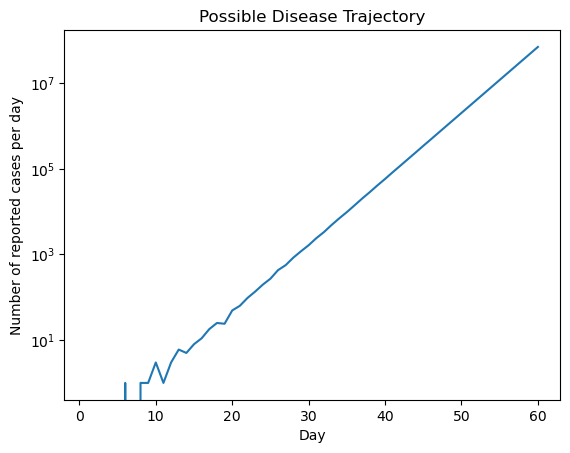

In [7]:
# Code to plot one possible disease trajectory. Re-run to see a different trajectory.
import pandas as pd
import matplotlib.pyplot as plt
m=60
s=pd.Series(simulateNewCases(m),index=range(1,m+1))
s.plot(logy=True,title='Possible Disease Trajectory')
plt.xlabel('Day')
plt.ylabel('Number of reported cases per day')
plt.show()

The following set of testing code uses your function to forecast the total number of reported cases within 60 days.

In [8]:
totalReports=pd.Series([sum(simulateNewCases(60)) for i in range(1000)])

In [9]:
# Your final numbers may be somewhat different. Don't worry about reproducing the exact same numbers.
print('Number of total reported cases in 60 days.')
print(f'  Forecast mean: {totalReports.mean():.0f}')
print(f'  Forecast standard deviation: {totalReports.std():.0f}')

Number of total reported cases in 60 days.
  Forecast mean: 233630821
  Forecast standard deviation: 156322161


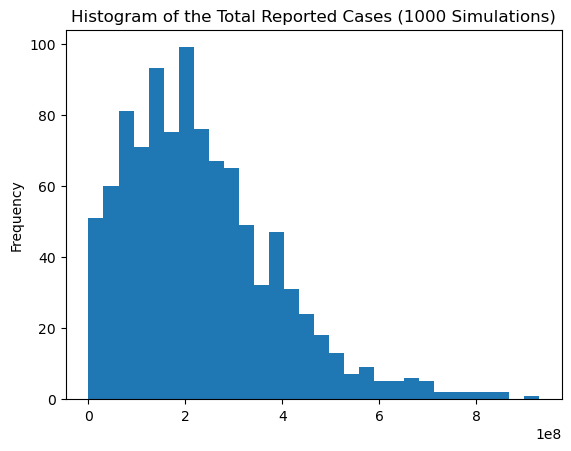

In [10]:
totalReports.plot(kind='hist',bins=30,\
                 title="Histogram of the Total Reported Cases (1000 Simulations)")
plt.show()

## Answering Policy Relevant Questions

Here are some examples of potentially interesting analyses that uses the simulation model above.

### i) Impact of the Incubation Period

What is the impact of the incubation period on the number of cases in the first 60 days?

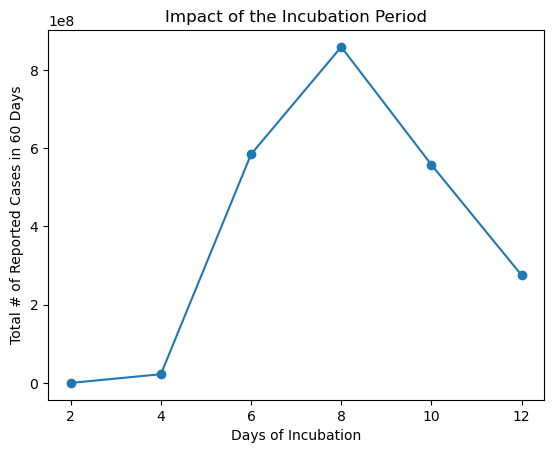

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
numCases=pd.Series(dtype=float)
for d in range(2,13,2):
    meanPrediction=np.mean([sum(simulateNewCases(60,d=d)) for i in range(1000)])
    numCases.loc[d]=meanPrediction
numCases.plot(style='o-',title='Impact of the Incubation Period')
plt.xlabel('Days of Incubation')
plt.ylabel('Total # of Reported Cases in 60 Days')
plt.show()

### ii) Impact of Better Hygiene 

How does the expected total number of cases change based on $p$?

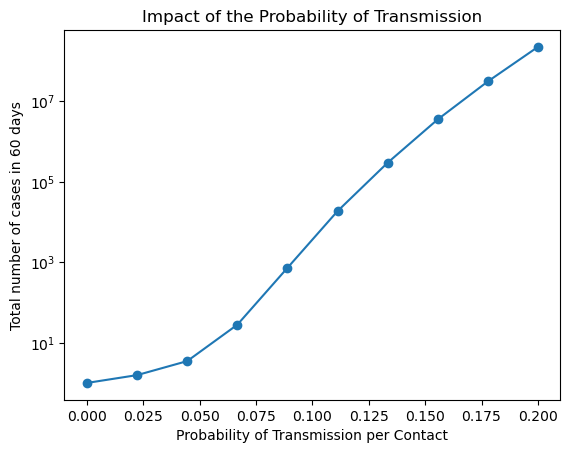

In [12]:
import numpy as np
pList=np.linspace(0,0.2,10)
numCases=pd.Series(dtype=float)
for p in pList:
    numCases.loc[p]=np.mean([sum(simulateNewCases(60,p=p)) for i in range(1000)])
numCases.plot(style='o-',title='Impact of the Probability of Transmission')    
plt.xlabel('Probability of Transmission per Contact')
plt.ylabel('Total number of cases in 60 days')
plt.yscale('log')
plt.show()

### iii) Length of an Outbreak after Herd Immunity

Suppose that most people in the city have been vaccinated, so that the parameter $p$ is reduced by 5 fold to $0.04$. Moreover, the city has been case free for a while. However, on day 0, 3 new people become infected. How many days would this outbreak last? For simplicity, we say that the outbreak has ended if there are no hospital reports for 14 days.

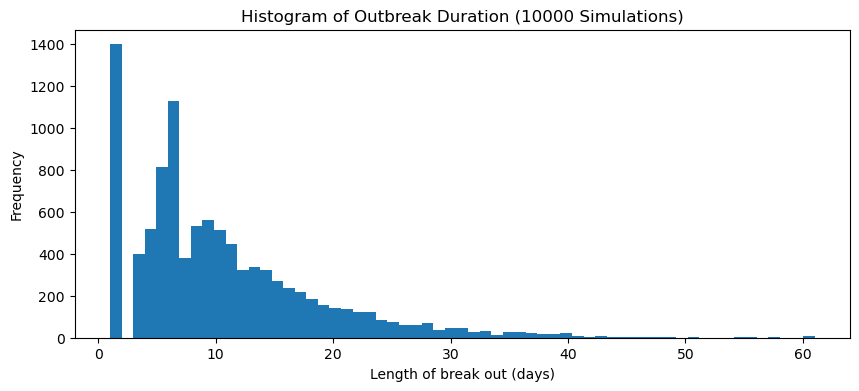

In [13]:
import pandas as pd
import numpy as np
length=[]
for i in range(10000):
    reports=simulateNewCases(78,initial=3,p=0.04)
    noCaseDays=0
    endDay=61
    day=0
    for cases in reports:
        if cases==0:
            noCaseDays+=1
            if noCaseDays>=14:
                endDay=day-14-4
                break
        else:
            noCaseDays=0
        day+=1
    length.append(endDay)
pd.Series(length).plot(kind='hist',bins=61,\
        title='Histogram of Outbreak Duration (10000 Simulations)',figsize=(10,4))
plt.xlabel('Length of break out (days)')
plt.show()

### (Optional) Additional Analysis

What is another interesting question that might be answered using the simulation model above? How would you go about doing the analysis? I encourage you to do the analysis in your own time for practice, but you don't have to hand in anything.